<a href="https://colab.research.google.com/github/Jitmandal051004/Pytorch-Practice-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Initialization

In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/andrewmvd/animal-faces")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jitmandal24
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces


100%|██████████| 696M/696M [00:05<00:00, 142MB/s] 


In [2]:
import torch
from torch import nn
from torch.optim import Adam
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import os

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


### Image Encoding

In [4]:
image_path = []
labels = []

for i in os.listdir("/content/animal-faces/afhq"):
  for label in os.listdir(f"/content/animal-faces/afhq/{i}"):
    for image in os.listdir(f"/content/animal-faces/afhq/{i}/{label}"):
      image_path.append(f"/content/animal-faces/afhq/{i}/{label}/{image}")
      labels.append(label)

data_df = pd.DataFrame(zip(image_path, labels), columns = ["image_path", "labels"])
print(data_df["labels"].unique())
data_df.head()

['wild' 'dog' 'cat']


,image_path,labels
0,/content/animal-faces/afhq/val/wild/flickr_wil...,wild
1,/content/animal-faces/afhq/val/wild/flickr_wil...,wild
2,/content/animal-faces/afhq/val/wild/flickr_wil...,wild
3,/content/animal-faces/afhq/val/wild/flickr_wil...,wild
4,/content/animal-faces/afhq/val/wild/flickr_wil...,wild


In [5]:
train = data_df.sample(frac = 0.7)
test = data_df.drop(train.index)

val = test.sample(frac = 0.5)
test = test.drop(val.index)

print(f'''train.shape : {train.shape}
test.shape : {test.shape}
val.shape : {val.shape}''')

train.shape : (11291, 2)
test.shape : (2419, 2)
val.shape : (2420, 2)


In [6]:
label_encoder = LabelEncoder()
label_encoder.fit(data_df["labels"])

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float)
])

### Custom Dataset

In [13]:
class CustomImageDataset(Dataset):
  def __init__(self, dataframe, transform = None):
    self.dataframe = dataframe
    self.transform = transform
    self.labels = torch.tensor(label_encoder.transform(dataframe["labels"])).to(device)

  def __len__(self):
    return self.dataframe.shape[0]

  def __getItem__(self, idx):
    img_path = self.dataframe.iloc[idx, 0]
    label = self.labels[idx]

    image = Image.open(img_path).convert('RGB')

    if self.transform:
      image = self.transform(image).to(device)

    return image, label

In [14]:
train_dataset = CustomImageDataset(train, transform)
test_dataset = CustomImageDataset(test, transform)
val_dataset = CustomImageDataset(val, transform)

In [21]:
train_dataset.__len__()

11291

In [20]:
train_dataset.__getItem__(51)

(tensor([[[0.4863, 0.4745, 0.4824,  ..., 0.2902, 0.3294, 0.3882],
          [0.4941, 0.4745, 0.4902,  ..., 0.2941, 0.3373, 0.3725],
          [0.4745, 0.4667, 0.4784,  ..., 0.3020, 0.3137, 0.3294],
          ...,
          [0.4627, 0.4667, 0.5412,  ..., 0.7843, 0.7882, 0.7882],
          [0.4314, 0.4784, 0.5765,  ..., 0.7843, 0.7922, 0.8039],
          [0.4039, 0.5098, 0.5961,  ..., 0.7843, 0.7804, 0.7765]],
 
         [[0.5020, 0.4745, 0.4863,  ..., 0.2941, 0.3176, 0.3647],
          [0.5020, 0.4667, 0.4824,  ..., 0.2941, 0.3255, 0.3569],
          [0.4745, 0.4510, 0.4667,  ..., 0.2902, 0.3098, 0.3255],
          ...,
          [0.2745, 0.2863, 0.3765,  ..., 0.8471, 0.8431, 0.8353],
          [0.2706, 0.3098, 0.3961,  ..., 0.8431, 0.8471, 0.8510],
          [0.2471, 0.3333, 0.3922,  ..., 0.8431, 0.8353, 0.8235]],
 
         [[0.5137, 0.4902, 0.4980,  ..., 0.2000, 0.2353, 0.2941],
          [0.5176, 0.4863, 0.5020,  ..., 0.2078, 0.2471, 0.2863],
          [0.4745, 0.4588, 0.4706,  ...,

In [18]:
label_encoder.inverse_transform([1])

array(['dog'], dtype=object)

### Visualization of the dataset

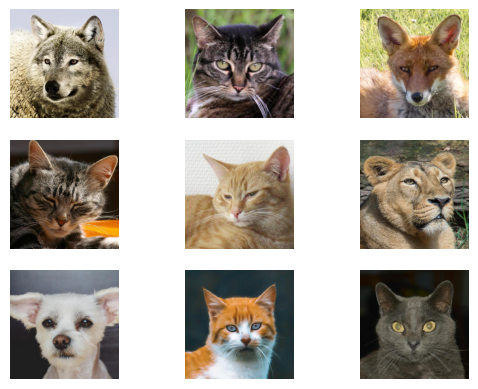

In [26]:
n_rows = 3
n_cols = 3


f, ax = plt.subplots(n_rows, n_cols)

for row in range(n_rows):
  for col in range(n_cols):
    image = Image.open(data_df.sample(n=1)["image_path"].iloc[0]).convert('RGB')
    ax[row, col].imshow(image)
    ax[row, col].axis("off")

plt.show()